In [1]:
###Integrantes:
###Manríquez Rangel Armando Daniel 
###González Robles Sofia Quetzalli
###Serrale salinas Alejandro
###Mariano Martínez Kevin 

In [7]:
# Librerías a utilizar:
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib.request
import requests
import time 
from multiprocessing import Process, Queue, Pool
import threading
import sys
import numpy as np
import re
#from random_user_agent.user_agent import UserAgent
#from random_user_agent.params import SoftwareName, OperatingSystem
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
#from fake_useragent import UserAgent
from selenium.webdriver.chrome.options import Options
import pandasql as ps
from IPython.display import display,HTML
import matplotlib.pyplot as plt

### Cuidado Con El Perro

In [4]:
def CCP(producto):
    """
    Función que hace WEB SCRAPPING EN LA PÁGINA DE CUIDADO CON EL PERRO
    """
    path = "C:\webdriver\chromedriver.exe"
    driver=webdriver.Chrome(path)
    time.sleep(8)
    ###URL de la pagina web al momento de realizar una busqueda, donde solo cambia la variable producto.
    url = "https://www.cuidadoconelperro.com.mx/search?words="+producto
    driver.get(url)
    ###dormimos el programa unos segundos para que sea capaz de buscar la informacion
    time.sleep(8)
    """
    Desde esta seccion se van a buscar las clases para los apartados en cuestion
    """
    ###El que abarca todo    
    productos= driver.find_elements_by_class_name("product-body")
    time.sleep(8)
    ###En esta parte encontramos como obtener el URL y lo plasmamos aqui, guardandolo en una lista 
    lista_urls=list()
    for i in range(len(productos)):
        try:
            lista_urls.append(productos[i].find_element_by_tag_name("a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)
    time.sleep(8)
            
    ### Se crea una lista donde guardamos el nombre del producto 
    lista_nombres=list()
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements_by_class_name("product-title")[0].text)
        except:
            lista_nombres.append(np.nan)
    
    time.sleep(8)
   
    ###Se crea una lista donde guardamos el precio,teniendo precio final,con descuento o cuando no cuenta con descuento
    ###El precio anterior es cuando si hay descuento, donde este es el precio antes del descuento.
    ###En caso de no tener un precio anterior se coloca un NaN        
    lista_precios=list()
    lista_promos=list()
    for i in range(len(productos)):
        try:
            lista_precios.append(productos[i].find_elements_by_class_name("new-price")[0].text)
        except:
            lista_precios.append(productos[i].find_elements_by_class_name("product-price")[0].text)
        try:
            lista_promos.append(productos[i].find_elements_by_class_name("old-price")[0].text)
        except:
            lista_promos.append(np.nan)
    ###Se hace el DataFrame con sus columnas   
    df_ccp = pd.DataFrame(columns=["Nombre","URL","PrecioFinal","PrecioAnterior"])
    ###Se llena la tabla con la información obtenida
    df_ccp["Nombre"]= lista_nombres
    df_ccp["URL"]= lista_urls
    df_ccp["PrecioFinal"]= lista_precios
    df_ccp["PrecioAnterior"]= lista_promos
    df_ccp["Tienda"]="CCP"
    df_ccp["Producto"]= producto
    df_ccp["Fecha"]= time.strftime("%d/%m/%y")
    ###Devolvemos el Data Frame
    df_ccp = df_ccp[["Fecha","Tienda","Producto","Nombre","URL","PrecioFinal","PrecioAnterior"]]
    driver.quit()
    return df_ccp

In [5]:
###Aplicamos a los 3 productos que elegimos
df_ccp = pd.DataFrame()
for productos in ["vestido","chamarra","pantalon"]:
    aux=CCP(productos)
    df_ccp =pd.concat([df_ccp,aux])
    

In [6]:
###Mostramos el resultado
df_ccp

,Fecha,Tienda,Producto,Nombre,URL,PrecioFinal,PrecioAnterior
0,15/12/22,CCP,vestido,Vestido Patchwork,https://www.cuidadoconelperro.com.mx/kids-nina...,$99.50 MXN,$199.00 MXN
1,15/12/22,CCP,vestido,Vestido Cuadros,https://www.cuidadoconelperro.com.mx/kids-nina...,$129.50 MXN,$259.00 MXN
2,15/12/22,CCP,vestido,Vestido Chambray,https://www.cuidadoconelperro.com.mx/kids-nina...,$109.50 MXN,$219.00 MXN
3,15/12/22,CCP,vestido,Vestido Volantes,https://www.cuidadoconelperro.com.mx/mujer/ves...,$174.30 MXN,$249.00 MXN
4,15/12/22,CCP,vestido,Vestido Drapeado,https://www.cuidadoconelperro.com.mx/mujer/ves...,$114.50 MXN,$229.00 MXN
...,...,...,...,...,...,...,...
1,15/12/22,CCP,pantalon,Pantalon Wide Leg Felpa Gris,https://www.cuidadoconelperro.com.mx/mujer/pan...,$249.00 MXN,NaN
2,15/12/22,CCP,pantalon,Pantalon Wide Leg Felpa Negro,https://www.cuidadoconelperro.com.mx/mujer/pan...,$249.00 MXN,NaN
3,15/12/22,CCP,pantalon,Pantalon Chino de Gabardina Negro,https://www.cuidadoconelperro.com.mx/hombre/pa...,$269.00 MXN,NaN
4,15/12/22,CCP,pantalon,Pantalon Chino de Gabardina Khaki,https://www.cuidadoconelperro.com.mx/hombre/pa...,$269.00 MXN,NaN


In [7]:
###Pasamos a el excel
df_ccp.to_excel("df_WebCCP.xlsx",index=False)

In [26]:
###Consulta donde muestra todo de los vestidos 
ps.sqldf("select  * from df_ccp where (Producto = 'vestido')")

,Fecha,Tienda,Producto,Nombre,URL,PrecioFinal,PrecioAnterior
0,15/12/22,CCP,vestido,Vestido Patchwork,https://www.cuidadoconelperro.com.mx/kids-nina...,$99.50 MXN,$199.00 MXN
1,15/12/22,CCP,vestido,Vestido Cuadros,https://www.cuidadoconelperro.com.mx/kids-nina...,$129.50 MXN,$259.00 MXN
2,15/12/22,CCP,vestido,Vestido Chambray,https://www.cuidadoconelperro.com.mx/kids-nina...,$109.50 MXN,$219.00 MXN
3,15/12/22,CCP,vestido,Vestido Volantes,https://www.cuidadoconelperro.com.mx/mujer/ves...,$174.30 MXN,$249.00 MXN
4,15/12/22,CCP,vestido,Vestido Drapeado,https://www.cuidadoconelperro.com.mx/mujer/ves...,$114.50 MXN,$229.00 MXN
5,15/12/22,CCP,vestido,Vestido Mesh,https://www.cuidadoconelperro.com.mx/mujer/ves...,$114.50 MXN,$229.00 MXN
6,15/12/22,CCP,vestido,Vestido Lentejuela,https://www.cuidadoconelperro.com.mx/mujer/ves...,$399.00 MXN,None
7,15/12/22,CCP,vestido,Vestido Azul,https://www.cuidadoconelperro.com.mx/mujer/ves...,$229.00 MXN,None
8,15/12/22,CCP,vestido,Vestido Vino,https://www.cuidadoconelperro.com.mx/mujer/ves...,$229.00 MXN,None
9,15/12/22,CCP,vestido,Vestido Negro,https://www.cuidadoconelperro.com.mx/mujer/ves...,$229.00 MXN,None


In [27]:
###Consulta donde muestra todos los productos donde el precio anterior no es nulo
ps.sqldf("select *  from df_ccp where PrecioAnterior is not null ")

,Fecha,Tienda,Producto,Nombre,URL,PrecioFinal,PrecioAnterior
0,15/12/22,CCP,vestido,Vestido Patchwork,https://www.cuidadoconelperro.com.mx/kids-nina...,$99.50 MXN,$199.00 MXN
1,15/12/22,CCP,vestido,Vestido Cuadros,https://www.cuidadoconelperro.com.mx/kids-nina...,$129.50 MXN,$259.00 MXN
2,15/12/22,CCP,vestido,Vestido Chambray,https://www.cuidadoconelperro.com.mx/kids-nina...,$109.50 MXN,$219.00 MXN
3,15/12/22,CCP,vestido,Vestido Volantes,https://www.cuidadoconelperro.com.mx/mujer/ves...,$174.30 MXN,$249.00 MXN
4,15/12/22,CCP,vestido,Vestido Drapeado,https://www.cuidadoconelperro.com.mx/mujer/ves...,$114.50 MXN,$229.00 MXN
5,15/12/22,CCP,vestido,Vestido Mesh,https://www.cuidadoconelperro.com.mx/mujer/ves...,$114.50 MXN,$229.00 MXN
6,15/12/22,CCP,vestido,Vestido Botones,https://www.cuidadoconelperro.com.mx/kids-nina...,$139.30 MXN,$199.00 MXN
7,15/12/22,CCP,vestido,Vestido Patchwork,https://www.cuidadoconelperro.com.mx/kids-nina...,$99.00 MXN,$128.57 MXN
8,15/12/22,CCP,vestido,Vestido Arcoíris,https://www.cuidadoconelperro.com.mx/kids-nina...,$149.00 MXN,$169.32 MXN
9,15/12/22,CCP,vestido,Vestido Rosa,https://www.cuidadoconelperro.com.mx/kids-nina...,$149.00 MXN,$169.32 MXN


In [28]:
###Consulta que muestra el nombre de todos las chamarras
ps.sqldf("select Nombre from df_ccp where (Producto = 'chamarra')")

,Nombre
0,Chamarra Camuflaje
1,Chamarra Roja
2,Chamarra Camuflaje
3,Chamarra Camuflaje
4,Chamarra Roja
5,Chamarra Marmoleado
6,Chamarra Marmoleado
7,Chamarra Acolchada
8,Chamarra Bicolor
9,Chamarra Bomber


In [31]:
###Consulta donde muestra URL de los pantalones con precio final menor a 500 pesos
ps.sqldf("select  URl from df_ccp where (Producto = 'pantalon') and PrecioFinal < 500")

,URL
0,https://www.cuidadoconelperro.com.mx/mujer/pan...
1,https://www.cuidadoconelperro.com.mx/mujer/pan...
2,https://www.cuidadoconelperro.com.mx/mujer/pan...
3,https://www.cuidadoconelperro.com.mx/hombre/pa...
4,https://www.cuidadoconelperro.com.mx/hombre/pa...
5,https://www.cuidadoconelperro.com.mx/hombre/pa...


In [37]:
###Consulta donde muestra todos los vestidos con precio anterior menor a 300 pesos
ps.sqldf("select  * from df_ccp where (Producto = 'vestido') and (PrecioAnterior < 300)")

,Fecha,Tienda,Producto,Nombre,URL,PrecioFinal,PrecioAnterior
0,15/12/22,CCP,vestido,Vestido Patchwork,https://www.cuidadoconelperro.com.mx/kids-nina...,$99.50 MXN,$199.00 MXN
1,15/12/22,CCP,vestido,Vestido Cuadros,https://www.cuidadoconelperro.com.mx/kids-nina...,$129.50 MXN,$259.00 MXN
2,15/12/22,CCP,vestido,Vestido Chambray,https://www.cuidadoconelperro.com.mx/kids-nina...,$109.50 MXN,$219.00 MXN
3,15/12/22,CCP,vestido,Vestido Volantes,https://www.cuidadoconelperro.com.mx/mujer/ves...,$174.30 MXN,$249.00 MXN
4,15/12/22,CCP,vestido,Vestido Drapeado,https://www.cuidadoconelperro.com.mx/mujer/ves...,$114.50 MXN,$229.00 MXN
5,15/12/22,CCP,vestido,Vestido Mesh,https://www.cuidadoconelperro.com.mx/mujer/ves...,$114.50 MXN,$229.00 MXN
6,15/12/22,CCP,vestido,Vestido Botones,https://www.cuidadoconelperro.com.mx/kids-nina...,$139.30 MXN,$199.00 MXN
7,15/12/22,CCP,vestido,Vestido Patchwork,https://www.cuidadoconelperro.com.mx/kids-nina...,$99.00 MXN,$128.57 MXN
8,15/12/22,CCP,vestido,Vestido Arcoíris,https://www.cuidadoconelperro.com.mx/kids-nina...,$149.00 MXN,$169.32 MXN
9,15/12/22,CCP,vestido,Vestido Rosa,https://www.cuidadoconelperro.com.mx/kids-nina...,$149.00 MXN,$169.32 MXN


### ZARA

In [8]:
def Zara_proyecto(producto):
    """
    Función que hace WEB SCRAPPING EN LA PÁGINA DE ZARA
    """
    path = "C:\webdriver\chromedriver.exe"
    driver=webdriver.Chrome(path)
    time.sleep(8)
    ### URL de la pagina web al momento de realizar una busqueda de un producto 
    url = "https://www.zara.com/mx/es/search?searchTerm="+producto+"&section=WOMAN"
    driver.get(url)
    ###La dormimos, de lo contrario no es posible obtener la informacion
    time.sleep(8)
    """
    Desde aquí se buscan las clases para los apartados en cuestion
    """
    ###El que abarca todo
    productos= driver.find_elements_by_class_name("product-grid-product__info-wrapper")
    time.sleep(8)
    
    ###Como extra encontramos como obtener el URL y lo plasmamos aquí, se guarda en una lista 
    lista_urls=list()
    for i in range(len(productos)):
        try:
            lista_urls.append(productos[i].find_element_by_tag_name("a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)
    time.sleep(8)
            
    ###Lista donde guardamos el nombre del producto 
    lista_nombres=list()
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements_by_tag_name("a")[0].text)
        except:
            lista_nombres.append(np.nan)
    
    time.sleep(8)
    ###Lista donde guardamos el precio, se maneja como precio final, el precio ya con descuento o cuando no cuenta con descuento
    ###El precio anterior es cuando si hay descuento, es el precio antes del descuento
    ###En caso de no tener se coloca un NaN
    lista_precios=list()
    lista_promos=list()
    for i in range(len(productos)):
        try:
            lista_precios.append(productos[i].find_elements_by_class_name("price-current__amount")[0].text)
        except:
            lista_precios.append(np.nan)
        try:
            lista_promos.append(productos[i].find_elements_by_class_name("price-old__amount")[0].text)
        except:
            lista_promos.append(np.nan)
    ###Se hace el DataFrame con sus columnas
    df_zara = pd.DataFrame(columns=["Nombre","URL","PrecioFinal","PrecioAnterior"])
    ###Se llena la tabla con la información obtenida
    df_zara["Nombre"]= lista_nombres
    df_zara["URL"]= lista_urls
    df_zara["PrecioFinal"]= lista_precios
    df_zara["PrecioAnterior"]= lista_promos
    df_zara["Tienda"]="ZARA"
    df_zara["Producto"]= producto
    df_zara["Fecha"]= time.strftime("%d/%m/%y")
    ###Devolvemos el Data Frame
    df_zara = df_zara[["Fecha","Tienda","Producto","Nombre","URL","PrecioFinal","PrecioAnterior"]]
    driver.quit()
    return df_zara

In [9]:
###Aplicamos a 3 productos
df_zara = pd.DataFrame()
for productos in ["vestido","chamarra","pantalon"]:
    aux=Zara_proyecto(productos)
    df_zara =pd.concat([df_zara,aux])
    

In [10]:
###Mostramos el resultado
df_zara

,Fecha,Tienda,Producto,Nombre,URL,PrecioFinal,PrecioAnterior
0,16/12/22,ZARA,vestido,VESTIDO ESTAMPADO ANIMAL CINTURÓN,https://www.zara.com/mx/es/vestido-estampado-a...,"1.299,00 MXN",NaN
1,16/12/22,ZARA,vestido,VESTIDO LENCERO SATINADO,https://www.zara.com/mx/es/vestido-lencero-sat...,"1.199,00 MXN",NaN
2,16/12/22,ZARA,vestido,VESTIDO JACQUARD HEBILLA,https://www.zara.com/mx/es/vestido-jacquard-he...,"1.199,00 MXN",NaN
3,16/12/22,ZARA,vestido,VESTIDO CRUZADO SATINADO,https://www.zara.com/mx/es/vestido-cruzado-sat...,"899,00 MXN",NaN
4,16/12/22,ZARA,vestido,VESTIDO RIB SOFT,https://www.zara.com/mx/es/vestido-rib-soft-p0...,"599,00 MXN",NaN
...,...,...,...,...,...,...,...
25,16/12/22,ZARA,pantalon,PANTALÓN EFECTO PIEL CINTURÓN,https://www.zara.com/mx/es/pantal%C3%B3n-efect...,"1.199,00 MXN",NaN
26,16/12/22,ZARA,pantalon,PANTALÓN MASCULINO RECTO,https://www.zara.com/mx/es/pantal%C3%B3n-mascu...,"899,00 MXN",NaN
27,16/12/22,ZARA,pantalon,PANTALÓN TIRO ALTO,https://www.zara.com/mx/es/pantal%C3%B3n-tiro-...,"799,00 MXN",NaN
28,16/12/22,ZARA,pantalon,PANTALÓN TIRO ALTO FLARE,https://www.zara.com/mx/es/pantal%C3%B3n-tiro-...,"1.199,00 MXN",NaN


In [41]:
###Pasamos a el excel
df_zara.to_excel("df_WebZara.xlsx",index=False)

In [11]:
###Consulta donde muestra el nombre y URL de los productos con precio final menor a 500 pesos 
ps.sqldf("select Nombre,URL  from df_zara where PrecioFinal <500")

,Nombre,URL
0,VESTIDO ESTAMPADO ANIMAL CINTURÓN,https://www.zara.com/mx/es/vestido-estampado-a...
1,VESTIDO LENCERO SATINADO,https://www.zara.com/mx/es/vestido-lencero-sat...
2,VESTIDO JACQUARD HEBILLA,https://www.zara.com/mx/es/vestido-jacquard-he...
3,VESTIDO CORTO PINZAS,https://www.zara.com/mx/es/vestido-corto-pinza...
4,VESTIDO MIDI JACQUARD,https://www.zara.com/mx/es/vestido-midi-jacqua...
5,VESTIDO BLAZER LENTEJUELAS,https://www.zara.com/mx/es/vestido-blazer-lent...
6,VESTIDO COMBINADO LENTEJUELAS,https://www.zara.com/mx/es/vestido-combinado-l...
7,VESTIDO BLAZER HEBILLAS LATERALES,https://www.zara.com/mx/es/vestido-blazer-hebi...
8,VESTIDO SATINADO FLECOS,https://www.zara.com/mx/es/vestido-satinado-fl...
9,VESTIDO CORTO ESTAMPADO,https://www.zara.com/mx/es/vestido-corto-estam...


In [12]:
###Consulta donde muestra el nombre y precios de los productos con algun descuento 
ps.sqldf("select  Nombre,PrecioFinal,PrecioAnterior from df_zara where PrecioAnterior <= 5000")

,Nombre,PrecioFinal,PrecioAnterior
0,VESTIDO CINTURÓN CON LINO,"599,00 MXN","1.299,00 MXN"
1,VESTIDO PLISADO CINTURÓN,"699,00 MXN","1.299,00 MXN"


In [13]:
###Consulta donde muestra todo de las chamarras con precio final menor a 1000 pesos 
ps.sqldf("select  * from df_zara where (Producto = 'chamarra') and PrecioFinal < 1000")

,Fecha,Tienda,Producto,Nombre,URL,PrecioFinal,PrecioAnterior


In [14]:
###Consulta donde muestra todo del producto con el precio final más alto 
ps.sqldf("select  *,Max(PrecioFinal) as PrecioMasAlto from df_zara")

,Fecha,Tienda,Producto,Nombre,URL,PrecioFinal,PrecioAnterior,PrecioMasAlto
0,16/12/22,ZARA,vestido,VESTIDO CRUZADO SATINADO,https://www.zara.com/mx/es/vestido-cruzado-sat...,"899,00 MXN",None,"899,00 MXN"


In [15]:
###Consulta donde muestra todo del producto con el precio final más bajo
ps.sqldf("select  *,Min(PrecioFinal) as PrecioMasBajo from df_zara")

,Fecha,Tienda,Producto,Nombre,URL,PrecioFinal,PrecioAnterior,PrecioMasBajo
0,16/12/22,ZARA,vestido,VESTIDO LENCERO SATINADO,https://www.zara.com/mx/es/vestido-lencero-sat...,"1.199,00 MXN",None,"1.199,00 MXN"


In [16]:
###Consulta donde muestra el precio promedio de cada producto
ps.sqldf("select  Producto,avg(PrecioFinal) as PrecioPromedio from df_zara group by Producto")

,Producto,PrecioPromedio
0,chamarra,NaN
1,pantalon,631.406500
2,vestido,298.742733


In [17]:
###Consulta donde muestra URL de los vestidos con precio final menor a 1000 pesos
ps.sqldf("select  URl from df_zara where (Producto = 'vestido') and PrecioFinal < 1000")

,URL
0,https://www.zara.com/mx/es/vestido-estampado-a...
1,https://www.zara.com/mx/es/vestido-lencero-sat...
2,https://www.zara.com/mx/es/vestido-jacquard-he...
3,https://www.zara.com/mx/es/vestido-corto-pinza...
4,https://www.zara.com/mx/es/vestido-midi-jacqua...
5,https://www.zara.com/mx/es/vestido-blazer-lent...
6,https://www.zara.com/mx/es/vestido-combinado-l...
7,https://www.zara.com/mx/es/vestido-blazer-hebi...
8,https://www.zara.com/mx/es/vestido-satinado-fl...
9,https://www.zara.com/mx/es/vestido-corto-estam...


In [18]:
###Consulta que muestra el nombre de todos los pantalones
ps.sqldf("select Nombre from df_zara where (Producto = 'pantalon')")

,Nombre
0,PANTALÓN TIRO ALTO EFECTO PIEL
1,PANTALÓN TIRO ALTO
2,PANTALÓN ZW THE MARINE STRAIGHT EFECTO PIEL
3,PANTALÓN TIRO ALTO
4,PANTALÓN TIRO ALTO
5,PANTALÓN LARGO FLUIDO
6,PANTALÓN MOM FIT HIGH RISE EFECTO PIEL
7,PANTALÓN ANCHO PINZAS
8,PANTALÓN SLIM FLARE ABERTURAS EFECTO PIEL
9,PANTALÓN TIRO ALTO


### Guess

In [19]:
def Guess(producto):
    """
    Función que hace WEB SCRAPPING EN LA PÁGINA DE GUESS
    """
    path = "C:\webdriver\chromedriver.exe"
    driver=webdriver.Chrome(path)
    time.sleep(8)
        ### URL de la pagina web al momento de realizar una busqueda de un producto 
    url = "https://www.guess.mx/"+producto
    driver.get(url)
        ###La dormimos, de lo contrario no es posible obtener la informacion 
        ### y el tiempo dependiendo la velocidad de nuestra computadora
    time.sleep(8)
    """
    Desde aquí se buscan las clases para los apartados en cuestion
    """
    ###El que abarca todo
    productos= driver.find_elements_by_class_name("product-item")
    time.sleep(8)

    ###Como extra encontramos como obtener el URL y lo plasmamos aquí, se guarda en una lista     
    lista_urls=list()
    for i in range(len(productos)):
        try:
            lista_urls.append(productos[i].find_element_by_tag_name("a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)
    time.sleep(8)
            
    ###Lista donde guardamos el nombre del producto 
    lista_nombres=list()
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements_by_class_name("product-item__name")[0].text)
        except:
            lista_nombres.append(np.nan)
    
    time.sleep(8)
    ###Lista donde guardamos el precio, se maneja como precio final el precio ya con descuento o cuando no cuenta con descuento
    ###El precio anterior es cuando si hay descuento, es el precio antes del descuento
    ###En caso de no tener se coloca un NaN            
    lista_precios=list()
    lista_promos=list()
    for i in range(len(productos)):
        try:
            lista_precios.append(productos[i].find_elements_by_class_name("price-new price-promo")[0].text)
        except:
            lista_precios.append(productos[i].find_elements_by_class_name("price-new")[0].text)
        try:
            lista_promos.append(productos[i].find_elements_by_class_name("price-old")[0].text)
        except:
            lista_promos.append(np.nan)
    ###Se hace el DataFrame con sus columnas        

    df_guess = pd.DataFrame(columns=["Nombre","URL","PrecioFinal","PrecioAnterior"])
    ###Se llena la tabla con la información obtenida    
    df_guess["Nombre"]= lista_nombres
    df_guess["URL"]= lista_urls
    df_guess["PrecioFinal"]= lista_precios
    df_guess["PrecioAnterior"]= lista_promos
    df_guess["Tienda"]="Guess"
    df_guess["Producto"]= producto
    df_guess["Fecha"]= time.strftime("%d/%m/%y")
    ###Devolvemos el Data Frame
    df_guess = df_guess[["Fecha","Tienda","Producto","Nombre","URL","PrecioFinal","PrecioAnterior"]]
    driver.quit()
    return df_guess

In [20]:
###Aplicamos 3 productos 
df_guess = pd.DataFrame()
for productos in ["vestido","chamarra","pantalon"]:
    aux=Guess(productos)
    df_guess =pd.concat([df_guess,aux])
    

In [21]:
###Mostramos el resultado
df_guess

,Fecha,Tienda,Producto,Nombre,URL,PrecioFinal,PrecioAnterior
0,16/12/22,Guess,vestido,Vestido Guess Irmine Para Mujer,https://www.guess.mx/vestido-guess-irmine-para...,"$1,036.00","$2,590.00"
1,16/12/22,Guess,vestido,Vestido Guess Asani Para Mujer,https://www.guess.mx/vestido-guess-asani-para-...,$956.00,"$2,390.00"
2,16/12/22,Guess,vestido,Vestido Guess Creta Para Mujer,https://www.guess.mx/vestido-guess-creta-para-...,"$1,556.00","$3,890.00"
3,16/12/22,Guess,vestido,Vestido Guess Amelia Para Mujer,https://www.guess.mx/vestido-guess-amelia-para...,"$2,590.00",NaN
4,16/12/22,Guess,vestido,Vestido Guess Colombe Para Mujer,https://www.guess.mx/vestido-guess-colombe-par...,"$1,196.00","$2,990.00"
5,16/12/22,Guess,vestido,Vestido Guess Originals x J Balvin Space Para ...,https://www.guess.mx/vestido-guess-originals-x...,$756.00,"$1,890.00"
6,16/12/22,Guess,vestido,Vestido Guess Zaira Para Mujer,https://www.guess.mx/vestido-guess-zaira-para-...,"$1,036.00","$2,590.00"
7,16/12/22,Guess,vestido,Vestido Guess Asani Para Mujer,https://www.guess.mx/vestido-guess-asani-para-...,$956.00,"$2,390.00"
8,16/12/22,Guess,vestido,Vestido Guess Sofia Para Mujer,https://www.guess.mx/vestido-guess-sofia-para-...,"$1,156.00","$2,890.00"
9,16/12/22,Guess,vestido,Vestido Guess Gemma Mirage Para Mujer,https://www.guess.mx/vestido-guess-gemma-mirag...,"$1,156.00","$2,890.00"


In [5]:
###Pasamos al excel
df_guess.to_excel("df_WebGuess.xlsx",index=False)

NameError: name 'df_guess' is not defined

In [115]:
###Consulta donde muestra el nombre y precio de todos los pantalones
ps.sqldf("select Nombre, PrecioFinal from df_guess where (Producto = 'pantalon')")

,Nombre,PrecioFinal
0,Pantalones Guess Colette Para Mujer,$876.00
1,Pantalones Guess Lonta Para Hombre,"$2,152.00"
2,Pantalones Guess Zoe Para Mujer,$876.00
3,Pantalones Guess Carmella Para Mujer,"$2,690.00"
4,Pantalones Guess Fremont Para Hombre,"$1,196.00"
5,Pantalones Guess Myron Para Hombre,$996.00
6,Pantalones Guess Kelly Para Mujer,"$2,290.00"
7,Pantalones Guess Kelly Para Mujer,"$2,990.00"
8,Pantalones Guess Chantal Para Mujer,"$3,190.00"
9,Pantalones Guess Teresa Para Mujer,"$2,490.00"


In [110]:
###Consulta donde muestra el nombre, precios y precios anteriores de las chamarras en orden ascendente
ps.sqldf("select  Nombre,PrecioFinal,PrecioAnterior from df_guess WHERE (Producto = 'chamarra')  ORDER BY PrecioFinal ")

,Nombre,PrecioFinal,PrecioAnterior
0,Chamarra Guess Originals Trucker Para Hombre,"$1,516.00","$3,790.00"
1,Chamarra Denim Guess Originals Sunnyside Para ...,"$1,996.00","$4,990.00"
2,Chamarra Guess Cube Para Mujer,"$2,116.00","$5,290.00"
3,Chamarra Guess Active Korbin Para Hombre,"$2,390.00",None
4,Chamarra Guess Daily Para Hombre,"$3,190.00",None
5,Chamarra Guess Originals x Betty Boop Velour P...,"$3,390.00",None
6,Chamarra Guess Olivia Para Mujer,"$3,790.00",None
7,Chamarra Guess Biker Para Hombre,"$4,090.00",None
8,Chamarra Guess Dillon Para Hombre,"$4,290.00",None
9,Chamarra Guess Active Puffer Para Mujer,"$4,490.00",None


In [116]:
###Consulta donde muestra el nombre y precio de todos los vestidos
ps.sqldf("select Nombre, PrecioFinal from df_guess where (Producto = 'vestido')")

,Nombre,PrecioFinal
0,Vestido Guess Irmine Para Mujer,"$1,036.00"
1,Vestido Guess Asani Para Mujer,$956.00
2,Vestido Guess Creta Para Mujer,"$1,556.00"
3,Vestido Guess Amelia Para Mujer,"$2,590.00"
4,Vestido Guess Colombe Para Mujer,"$1,196.00"
5,Vestido Guess Originals x J Balvin Space Para ...,$756.00
6,Vestido Guess Zaira Para Mujer,"$1,036.00"
7,Vestido Guess Asani Para Mujer,$956.00
8,Vestido Guess Sofia Para Mujer,"$1,156.00"
9,Vestido Guess Gemma Mirage Para Mujer,"$1,156.00"


In [112]:
###Consulta donde muestra el nombre, precios actuales y anteriores de las chamarras en orden ascendente según su precio anterior
ps.sqldf("select  Nombre,PrecioFinal,PrecioAnterior from df_guess WHERE (Producto = 'vestido')  ORDER BY PrecioAnterior ")

,Nombre,PrecioFinal,PrecioAnterior
0,Vestido Guess Amelia Para Mujer,"$2,590.00",None
1,Vestido Guess Originals x J Balvin Space Para ...,$756.00,"$1,890.00"
2,Vestido Guess Asani Para Mujer,$956.00,"$2,390.00"
3,Vestido Guess Asani Para Mujer,$956.00,"$2,390.00"
4,Vestido Guess Irmine Para Mujer,"$1,036.00","$2,590.00"
5,Vestido Guess Zaira Para Mujer,"$1,036.00","$2,590.00"
6,Vestido Guess Sofia Para Mujer,"$1,156.00","$2,890.00"
7,Vestido Guess Gemma Mirage Para Mujer,"$1,156.00","$2,890.00"
8,Vestido Guess Gemma Mirage Para Mujer,"$1,156.00","$2,890.00"
9,Vestido Guess Colombe Para Mujer,"$1,196.00","$2,990.00"


In [114]:
###Consulta donde muestra el nombre, precios actuales y anteriores de los pantalones en orden ascendente según su precio anterior
ps.sqldf("select  Nombre,PrecioFinal,PrecioAnterior from df_guess WHERE (Producto = 'pantalon')  ORDER BY PrecioAnterior ")

,Nombre,PrecioFinal,PrecioAnterior
0,Pantalones Guess Carmella Para Mujer,"$2,690.00",None
1,Pantalones Guess Kelly Para Mujer,"$2,290.00",None
2,Pantalones Guess Kelly Para Mujer,"$2,990.00",None
3,Pantalones Guess Chantal Para Mujer,"$3,190.00",None
4,Pantalones Guess Teresa Para Mujer,"$2,490.00",None
5,Pantalones Guess Teresa Para Mujer,"$2,490.00",None
6,Pantalones Guess Colette Para Mujer,$876.00,"$2,190.00"
7,Pantalones Guess Zoe Para Mujer,$876.00,"$2,190.00"
8,Pantalones Guess Viola Para Mujer,$916.00,"$2,290.00"
9,Pantalones Guess Myron Para Hombre,$996.00,"$2,490.00"


In [43]:
###Consulta que muestra el nombre de todos los chamarras
ps.sqldf("select Nombre from df_guess where (Producto = 'chamarra')")

,Nombre
0,Chamarra Guess Daily Para Hombre
1,Chamarra Guess Biker Para Hombre
2,Chamarra Guess Dillon Para Hombre
3,Chamarra Guess Olivia Para Mujer
4,Chamarra Guess Originals Trucker Para Hombre
5,Chamarra Guess Originals x Banksy Queen Para H...
6,Chamarra Guess Originals x Betty Boop Velour P...
7,Chamarra Guess Active Puffer Para Mujer
8,Chamarra Guess Cube Para Mujer
9,Chamarra Denim Guess Originals Sunnyside Para ...


In [17]:
df_union=pd.concat([df_ccp,df_zara,df_guess])
df_union.to_excel("df_WebUnion.xlsx",index=False)

In [18]:
df_union

,Fecha,Tienda,Producto,Nombre,URL,PrecioFinal,PrecioAnterior
0,14/12/22,CCP,vestido,Vestido Volantes,https://www.cuidadoconelperro.com.mx/mujer/ves...,$174.30 MXN,$249.00 MXN
1,14/12/22,CCP,vestido,Vestido Drapeado,https://www.cuidadoconelperro.com.mx/mujer/ves...,$114.50 MXN,$229.00 MXN
2,14/12/22,CCP,vestido,Vestido Mesh,https://www.cuidadoconelperro.com.mx/mujer/ves...,$114.50 MXN,$229.00 MXN
3,14/12/22,CCP,vestido,Vestido Lentejuela,https://www.cuidadoconelperro.com.mx/mujer/ves...,$399.00 MXN,NaN
4,14/12/22,CCP,vestido,Vestido Azul,https://www.cuidadoconelperro.com.mx/mujer/ves...,$229.00 MXN,NaN
...,...,...,...,...,...,...,...
7,14/12/22,Guess,pantalon,Pantalones Guess Kelly Para Mujer,https://www.guess.mx/pantalones-guess-kelly-pa...,"$2,990.00",NaN
8,14/12/22,Guess,pantalon,Pantalones Guess Chantal Para Mujer,https://www.guess.mx/pantalones-guess-chantal-...,"$3,190.00",NaN
9,14/12/22,Guess,pantalon,Pantalones Guess Teresa Para Mujer,https://www.guess.mx/pantalones-guess-teresa-p...,"$2,490.00",NaN
10,14/12/22,Guess,pantalon,Pantalones Guess Teresa Para Mujer,https://www.guess.mx/pantalones-guess-teresa-p...,"$2,490.00",NaN


1. Comparativa de los precios más económicos de cada producto en cada tienda, visualizado con gráfico de barras y líneas.
El color negro representará la tienda: Cuidado con el Perro
El Rojo : Guess 
El Rosa : Zara
            

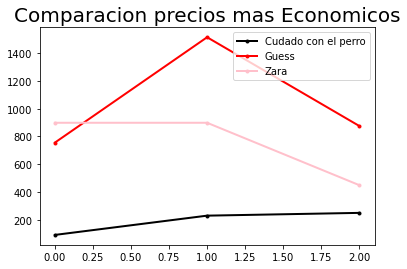

In [57]:
import matplotlib.pyplot as plt

fig=plt.plot([90,229,249], linestyle="-",linewidth=2,marker="o",markersize=3 ,color="black",label="Cudado con el perro")
fig=plt.plot([756,1516,876] , linestyle="-",linewidth=2,marker="o",markersize=3 ,color="red",label="Guess")
fig=plt.plot([899,899,449] , linestyle="-",linewidth=2,marker="o",markersize=3 ,color="pink",label="Zara")
plt.title("Comparacion precios mas Economicos",fontsize=20)
plt.legend()
plt.show()

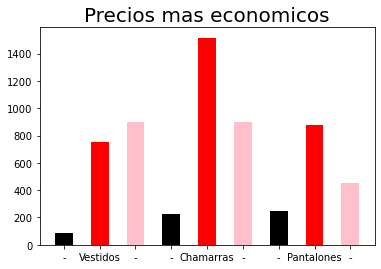

In [58]:
fig, ax = plt.subplots()
plt.bar(range(9), [90,756, 899, 229, 1516, 899, 249, 876, 449], color=["black","red","pink","black","red","pink","black","red","pink"],align='center', width = 0.5)
plt.title("Precios mas economicos",fontsize=20)
names = ["-","Vestidos","-", "-", "Chamarras","-", "-", "Pantalones", "-"]
ax.set_xticks(range(9))
ax.set_xticklabels(names)
plt.show()

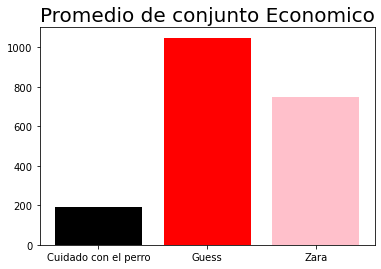

In [59]:
ccp_p = (90+229+249)/3
guess_p = (756+1516+876)/3
zara_p = (899+899+449)/3


fig, ax = plt.subplots()
plt.bar(range(3), [ccp_p, guess_p, zara_p], color=["black","red","pink"],align='center')
plt.title("Promedio de conjunto Economico",fontsize=20)
names = ["Cuidado con el perro","Guess","Zara"]
ax.set_xticks(range(3))
ax.set_xticklabels(names)
plt.show()

#### 3. Comparativa de los precios más Costosos de cada producto en cada tienda, visualizado con gráfico de barras y líneas, el color negro representará la tienda: Cuidado con el Perro, el Rojo : Guess y el Rosa : Zara

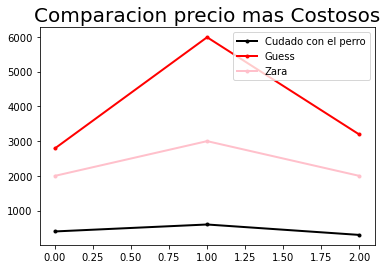

In [60]:
fig=plt.plot([399,599,299], linestyle="-",linewidth=2,marker="o",markersize=3 ,color="black",label="Cudado con el perro")
fig=plt.plot([2790,5990,3190] , linestyle="-",linewidth=2,marker="o",markersize=3 ,color="red",label="Guess")
fig=plt.plot([1999,2999,1999] , linestyle="-",linewidth=2,marker="o",markersize=3 ,color="pink",label="Zara")
plt.title("Comparacion precio mas Costosos",fontsize=20)
plt.legend()
plt.show()

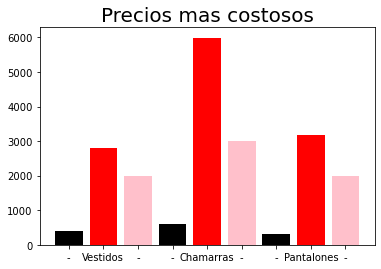

In [61]:
fig, ax = plt.subplots()
plt.bar(range(9), [399,2790, 1999, 599, 5990, 2999, 299, 3190, 1999], color=["black","red","pink","black","red","pink","black","red","pink"],align='center')
plt.title("Precios mas costosos",fontsize=20)
names = [ "-","Vestidos","-", "-", "Chamarras","-", "-", "Pantalones", "-"]
ax.set_xticks(range(9))
ax.set_xticklabels(names)
plt.show()

#### 4. Ahora obtengamos el promedio del conjunto(Vestido, pantalón y Chamarra) más Costoso por tienda:


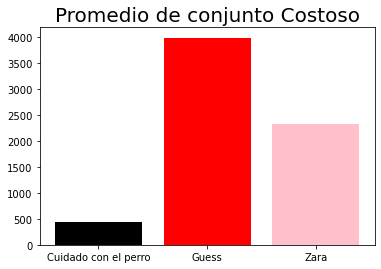

In [62]:
ccp_p2 = (399+599+299)/3
guess_p2 = (2790+5990+3190)/3
zara_p2 = (1999+2999+1999)/3

fig, ax = plt.subplots()
plt.bar(range(3), [ccp_p2, guess_p2, zara_p2], color=["black","red","pink"],align='center')
plt.title("Promedio de conjunto Costoso",fontsize=20)
names = ["Cuidado con el perro","Guess","Zara"]
ax.set_xticks(range(3))
ax.set_xticklabels(names)
plt.show()